Используемая реализация алогоритма https://github.com/ymoch/apyori

In [1]:
!pip install apyori

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import DatasetManager as dm
import time

In [3]:
import shutil, os 
from apyori import apriori, dump_as_json
from IPython.display import display, HTML
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import json

def show(result):
    output = []
    for RelationRecord in result:
        o = StringIO()
        dump_as_json(RelationRecord, o)
        output.append(json.loads(o.getvalue()))
    data_df = pd.DataFrame(output)
    # и взгялнем на итоги
    pd.set_option('display.max_colwidth', None)

    display(HTML(data_df.to_html()))

In [10]:
def go_apriori(transactions, min_support, min_confidence):
    start = time.time()
    apriori_res = list(apriori(transactions, min_support = min_support, min_confidence = min_confidence))
    end = time.time() - start
    
    rulCount = len(apriori_res)
    
    maxLen = 0
    for rule in apriori_res:
        for statistic in rule.ordered_statistics:
            if len(statistic.items_add) + len(statistic.items_base) > maxLen:
                maxLen = len(statistic.items_add) + len(statistic.items_base)
                
    lessSevenCount = 0
    for rule in apriori_res:
        for statistic in rule.ordered_statistics:
            if len(statistic.items_add) + len(statistic.items_base) <= 7:
                lessSevenCount += 1
                
    return (apriori_res, end, rulCount, maxLen, lessSevenCount)

In [5]:
min_conf = [0.2, 0.25, 0.30]

## 1 dataset

In [6]:
#Загружаем данные
#records - преобразованный датасет
#products - уникальный список товаров
#transactions - транзакции
records1, products1, transactions1 = dm.LoadFirst()

In [11]:
result1_1, end1_1, rulCount1_1, maxLen1_1, lessSevenCount1_1 = go_apriori(transactions1, 0.0003, min_conf[0])
result2_1, end2_1, rulCount2_1, maxLen2_1, lessSevenCount2_1 = go_apriori(transactions1, 0.0003, min_conf[1])
result3_1, end3_1, rulCount3_1, maxLen3_1, lessSevenCount3_1 = go_apriori(transactions1, 0.0003, min_conf[2])

In [ ]:
#show(result)

## 2 dataset

In [12]:
#Загружаем данные
#records - преобразованный датасет
#products - уникальный список товаров
#transactions - транзакции
records2, products2, transactions2 = dm.LoadSecond()

In [13]:
result1_2, end1_2, rulCount1_2, maxLen1_2, lessSevenCount1_2 = go_apriori(transactions2, 0.01, min_conf[0])
result2_2, end2_2, rulCount2_2, maxLen2_2, lessSevenCount2_2 = go_apriori(transactions2, 0.01, min_conf[1])
result3_2, end3_2, rulCount3_2, maxLen3_2, lessSevenCount3_2 = go_apriori(transactions2, 0.01, min_conf[2])

In [14]:
#show(result)

## 3 dataset

In [15]:
#Загружаем данные
#records - преобразованный датасет
#products - уникальный список товаров
#transactions - транзакции
records3, products3, transactions3 = dm.LoadThird()

In [16]:
result1_3, end1_3, rulCount1_3, maxLen1_3, lessSevenCount1_3 = go_apriori(transactions3, 0.01, min_conf[0])
result2_3, end2_3, rulCount2_3, maxLen2_3, lessSevenCount2_3 = go_apriori(transactions3, 0.01, min_conf[1])
result3_3, end3_3, rulCount3_3, maxLen3_3, lessSevenCount3_3 = go_apriori(transactions3, 0.01, min_conf[2])

In [17]:
#show(result)

## Диаграмы

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
groups = list(['A(' + str(sup) + ')' for sup in min_conf])

### 1 dataset

<BarContainer object of 3 artists>

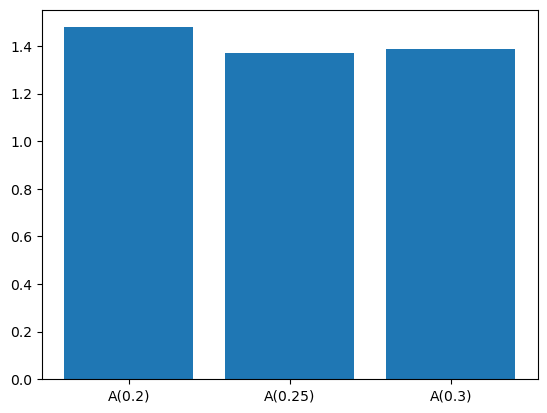

In [21]:
counts = [end1_1, end2_1, end3_1]
plt.bar(groups, counts)

<BarContainer object of 3 artists>

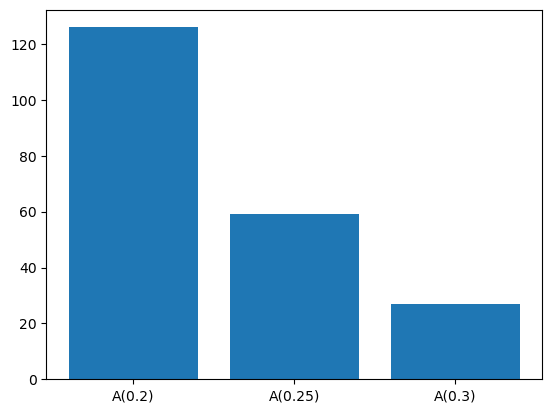

In [22]:
counts = [rulCount1_1, rulCount2_1, rulCount3_1]
plt.bar(groups, counts)

<BarContainer object of 3 artists>

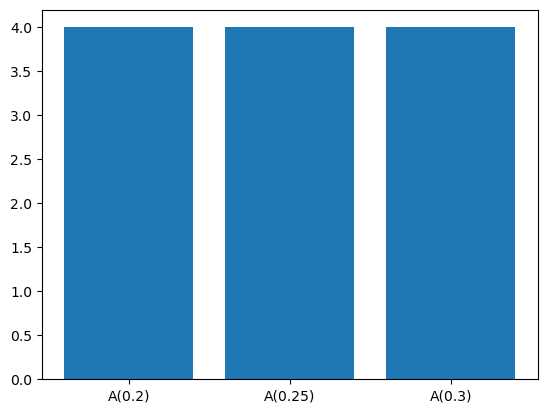

In [23]:
counts = [maxLen1_1, maxLen2_1, maxLen3_1]
plt.bar(groups, counts)

<BarContainer object of 3 artists>

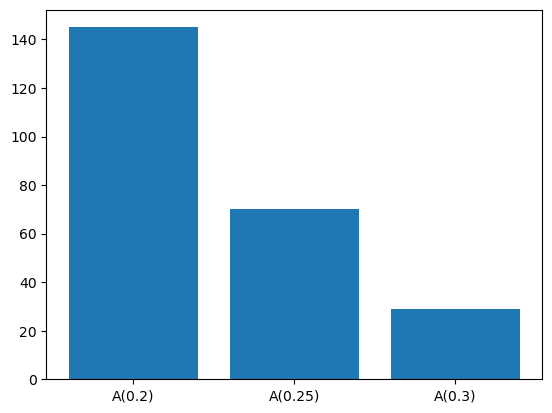

In [24]:
counts = [lessSevenCount1_1, lessSevenCount2_1, lessSevenCount3_1]
plt.bar(groups, counts)

### 2 dataset

<BarContainer object of 3 artists>

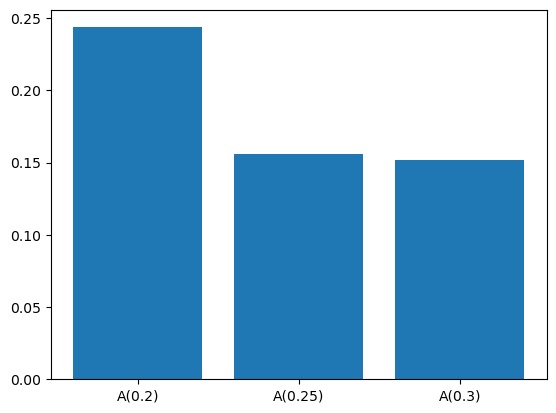

In [25]:
counts = [end1_2, end2_2, end3_2]
plt.bar(groups, counts)

<BarContainer object of 3 artists>

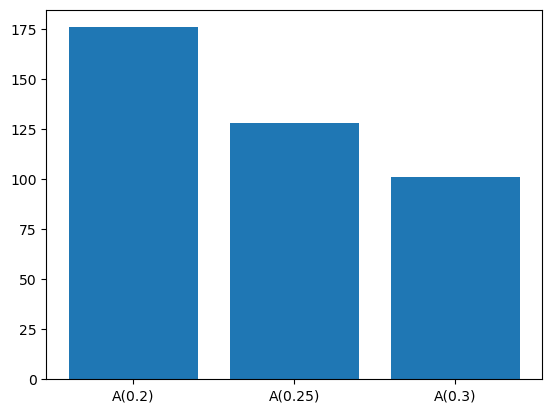

In [26]:
counts = [rulCount1_2, rulCount2_2, rulCount3_2]
plt.bar(groups, counts)

<BarContainer object of 3 artists>

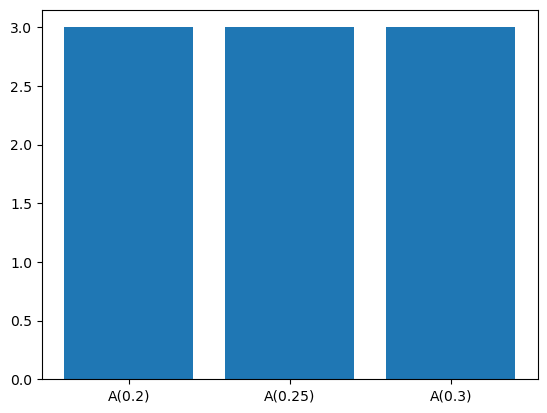

In [27]:
counts = [maxLen1_2, maxLen2_2, maxLen3_2]
plt.bar(groups, counts)

<BarContainer object of 3 artists>

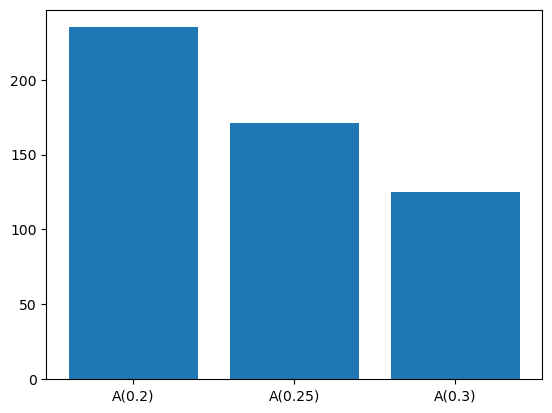

In [28]:
counts = [lessSevenCount1_2, lessSevenCount2_2, lessSevenCount3_2]
plt.bar(groups, counts)

### 3 dataset

<BarContainer object of 3 artists>

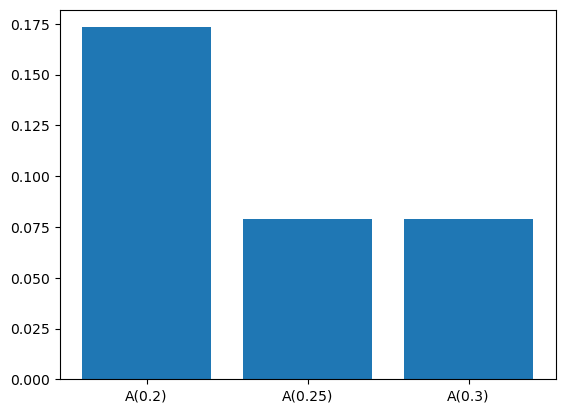

In [29]:
counts = [end1_3, end2_3, end3_3]
plt.bar(groups, counts)

<BarContainer object of 3 artists>

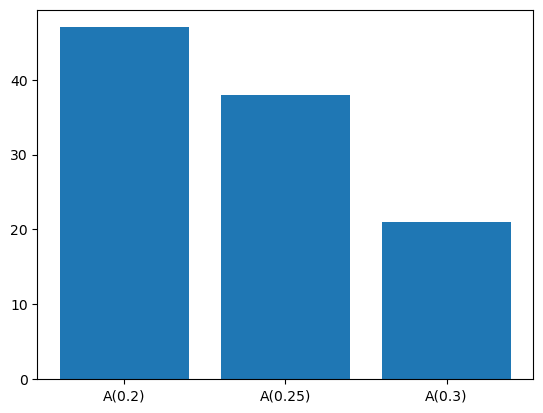

In [30]:
counts = [rulCount1_3, rulCount2_3, rulCount3_3]
plt.bar(groups, counts)

<BarContainer object of 3 artists>

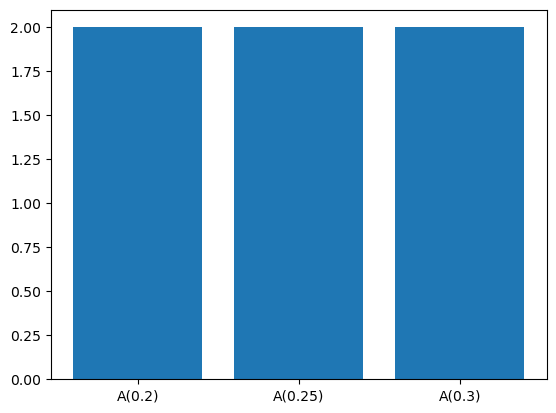

In [31]:
counts = [maxLen1_3, maxLen2_3, maxLen3_3]
plt.bar(groups, counts)

<BarContainer object of 3 artists>

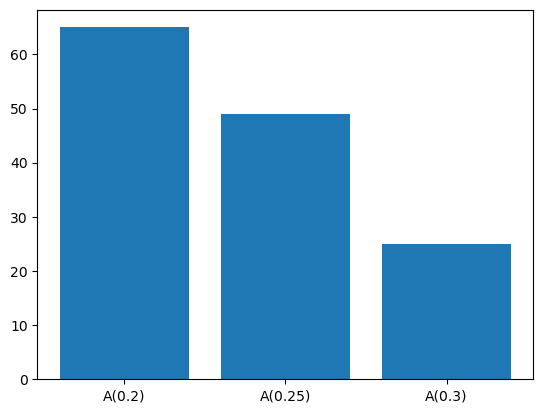

In [32]:
counts = [lessSevenCount1_3, lessSevenCount2_3, lessSevenCount3_3]
plt.bar(groups, counts)